In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("clean_data_.csv")

In [7]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,18,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,18,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,8,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,18,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,8,1,0,1,5.52,0


#### Decision Tree 

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
x = data.drop('booking_complete',axis=1)
y = data[['booking_complete']]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.30,stratify=y,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34117, 13), (14622, 13), (34117, 1), (14622, 1))

In [12]:
#Model building
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train,y_train)

dt_pred = decision_tree.predict(x_test)

In [13]:
dt_pred_tr = decision_tree.predict(x_train)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_train,dt_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28999
           1       1.00      1.00      1.00      5118

    accuracy                           1.00     34117
   macro avg       1.00      1.00      1.00     34117
weighted avg       1.00      1.00      1.00     34117



In [15]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12428
           1       0.28      0.31      0.29      2194

    accuracy                           0.78     14622
   macro avg       0.58      0.58      0.58     14622
weighted avg       0.79      0.78      0.78     14622



* There is a 20% difference in accuarcy of train and test data

### Random Forest model

In [16]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [17]:
classifier.fit(x_train,y_train)

C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [18]:
predicted_values = classifier.predict(x_train)

In [19]:
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28999
           1       1.00      1.00      1.00      5118

    accuracy                           1.00     34117
   macro avg       1.00      1.00      1.00     34117
weighted avg       1.00      1.00      1.00     34117



In [20]:
predicted_values_ts = classifier.predict(x_test)
print(classification_report(y_test,predicted_values_ts))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12428
           1       0.49      0.09      0.15      2194

    accuracy                           0.85     14622
   macro avg       0.67      0.53      0.53     14622
weighted avg       0.80      0.85      0.80     14622



#### We got 85% accuarcy from the random forest model.

#### Feature Importance 

In [21]:
model = RFC(max_depth=9)
model.fit(x_train,y_train)
feature_imp = pd.Series(model.feature_importances_, index = x.columns)
k = feature_imp.sort_values()

C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Text(0.5, 1.0, 'Feature Importance')

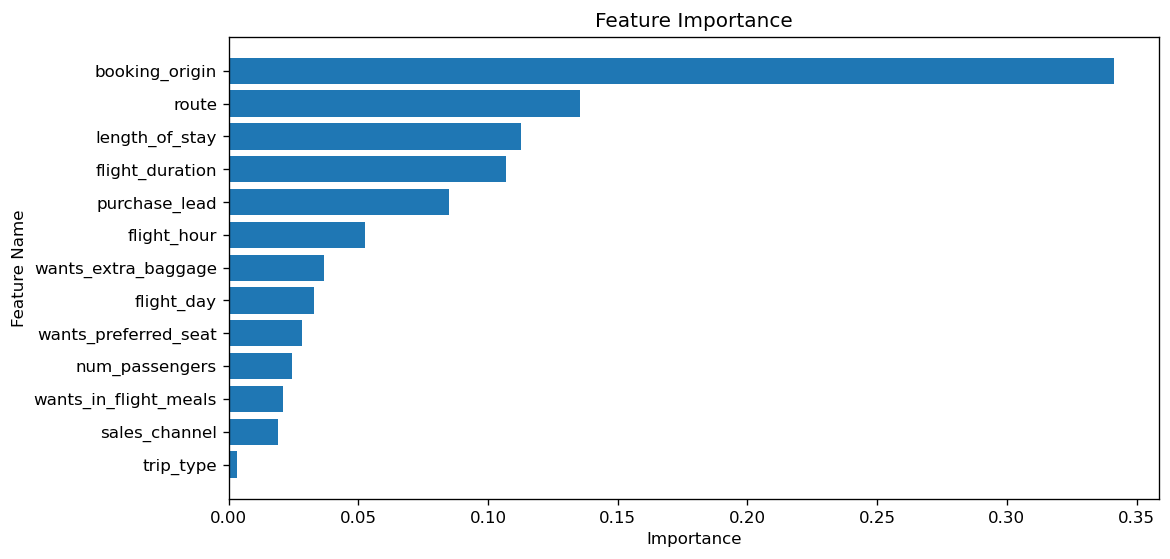

In [22]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')